In [1]:
import numpy as np
import scipy as sc
import pickle
import sys
import os
import matplotlib.pyplot as plt
from skimage import io
from skimage import transform
import skimage

np.random.seed(1)

In [52]:
#rotates image (img) by X degrees (degree) in a counter clock-wise fashion
def rotateImage(img,degree):
    curList = []

    for i in range(0,len(img)):
        t=skimage.transform.rotate(img[i],degree)
        curList.append(t)

    newArr = np.stack(curList)
    return(newArr)

In [3]:
#flips image vertically
def vFlipImage(img1):
    curList = []

    for i in range(0,len(img1)):
        t = np.flip(img1[i],axis=0)
        curList.append(t)

    newArr = np.stack(curList)
    return(newArr)

In [4]:
#flips image horizontally
def hFlipImage(img2):
    curList = []

    for i in range(0,len(img2)):
        t = np.flip(img2[i],axis=1)
        curList.append(t)

    newArr = np.stack(curList)
    return(newArr)

In [62]:
# input: image (3D matrix)
# output: new image (3D image)
# will randomly choose to flip on horizontal axis,
# vertical axis, and a random rotation between 0
# and 360 degress. 
def randomImgChange(img3):
    hFlipRand = np.random.rand(1) < .5
    vFlipRand = np.random.rand(1) < .5
    
    degree = np.random.randint(0,360)
    
    if hFlipRand == True:
        img3 = hFlipImage(img3)
    if vFlipRand == True:
        img3 = vFlipImage(img3)

    img3 = rotateImage(img3,degree)
    return(img3)

In [61]:
# return a list of images (each image is a 3D matrix)
# each image will have been randomly transformed
# by a horizontal flip, vertical flip, and 
# rotation
def manyRandImg(img,num):
    imgList = []
    for i in range(0,num):
        newImg = randomImgChange(img)
        imgList.append(newImg)

In [ ]:
def train(X, Y, lamb):
    A = X.T.dot(X)
    A = A + lamb*np.identity(A.shape[0])
    b = X.T.dot(Y)
    W_hat = np.linalg.solve(A, b)
    return(W_hat)

def predict(W, X):
    ret = W.T.dot(X.T)
    return(list(np.argmax(ret, axis=0)))

def accuracy(y_true, y_hat):
    ones = []
    for i in range(len(y_true)):
        if int(y_true[i]) == int(y_hat[i]):
            ones.append(1.0)
        else:
            ones.append(0.0)
    return(np.mean(np.array(ones)))

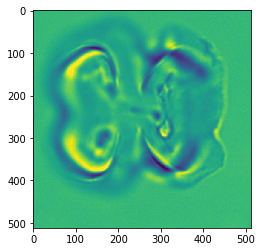

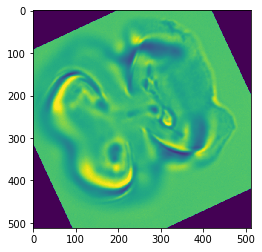

In [63]:
curDir = os.getcwd()
tiffFile ='../../data/Oryza_barthii_NEW.lif - Series003 - C=1.tif'

im = io.imread(tiffFile)

plt.imshow(im[100])
plt.show()

tmpImg = randomImgChange(im)
plt.imshow(tmpImg[100])
plt.show()